#### 6.3 Geographical Visualisation

##### 01. Import Libraries

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display   
import matplotlib.pyplot as plt
import plotly.io as pio
import folium
import json

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

##### 02. Import the Dataframe

In [3]:
# Import ".json" file for the world

countries_geo = r'C:\Users\Lumex\Documents\Achievement_6_Project\Chocolate Bar Rating\02 Data\Original Data\worldmap.json'

In [4]:
#create a path
path = r'C:\Users\Lumex\Documents\Achievement_6_Project\Chocolate Bar Rating'
df_choco = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'flavors_of_cacao_cleaned.csv'))

In [5]:
# Change the format of the values visualization
pd.options.display.float_format = '{:.2f}'.format
# Reseting the maximum number of columns to display to default (all columns)
pd.set_option('display.max_columns', None)

#### wrangle data

In [6]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\Lumex\Documents\Achievement_6_project\Chocolate Bar Rating\02 Data\Original Data\worldmap.json', encoding='utf-8')
  # returns JSON object asa dictionary
data = json.load(f)
  # Iterating through the json list
for i in data['features']:
    print(i)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



##### 03. Clean the data

In [7]:
#view the data
df_choco.head(20)

,Unnamed: 0,Company (Maker-if known),name_of_city_for_beanorigin,REF,review_year,cocoa_percent,company_location,Rating,bean_type,country_of_bean_origin
0,0,A. Morin,Agua Grande,1876,2016,63.00,France,3.75,,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70.00,France,2.75,,Togo
2,2,A. Morin,Atsane,1676,2015,70.00,France,3.00,,Togo
3,3,A. Morin,Akata,1680,2015,70.00,France,3.50,,Togo
4,4,A. Morin,Quilla,1704,2015,70.00,France,3.50,,Peru
5,5,A. Morin,Carenero,1315,2014,70.00,France,2.75,Criollo,Venezuela
6,6,A. Morin,Cuba,1315,2014,70.00,France,3.50,,Cuba
7,7,A. Morin,Sur del Lago,1315,2014,70.00,France,3.50,Criollo,Venezuela
8,8,A. Morin,Puerto Cabello,1319,2014,70.00,France,3.75,Criollo,Venezuela
9,9,A. Morin,Pablino,1319,2014,70.00,France,4.00,,Peru


In [8]:
#remove the "Unnamed" column
df_choco.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
#view the number of rows and columns 
df_choco.shape

(1795, 9)

In [28]:
#Rename the column name.
df_choco.rename(columns = {
    "Rating": "rating",
    "REF": "reference_numb",
    "Company  (Maker-if known)":"Manufacturing_company",
    "name_of_city_for_beanorigin":"city_origin(bean)",
    "country_of_bean_origin":"country_origin(bean)",
}, inplace=True)

In [29]:
df_choco.head(5)

,Company (Maker-if known),city_origin(bean),reference_numb,review_year,cocoa_percent,company_location,rating,bean_type,country_origin(bean)
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,Missing,Sao Tome
1,A. Morin,Kpime,1676,2015,70,France,2.75,Missing,Togo
2,A. Morin,Atsane,1676,2015,70,France,3.00,Missing,Togo
3,A. Morin,Akata,1680,2015,70,France,3.50,Missing,Togo
4,A. Morin,Quilla,1704,2015,70,France,3.50,Missing,Peru


In [30]:
#Deal with missing Data
#remove NaN values and convert to int
df_choco['cocoa_percent'] = df_choco['cocoa_percent'].fillna(0).astype(int)

In [31]:
df_choco['bean_type'] = df_choco['bean_type'].str.strip() #remove the empty space in the bean_type
df_choco['bean_type'] = df_choco['bean_type'].replace('', 'Missing') #replace the empty cell with the 'Missing'

In [32]:
#Get the top bean_type
top_bean = df_choco['bean_type'].value_counts().head(10)
# Create a DataFrame of top 'Bean_Type' values and their counts
top_bean_df = pd.DataFrame({'bean_type': top_bean.index, 'Count': top_bean.values})

In [33]:
def highlight_missing(s):
    is_missing = s == 'Missing'
    return ['background-color: yellow' if v else '' for v in is_missing]

styled_table = top_bean_df.style.apply(highlight_missing)

# Display the styled table
styled_table

,bean_type,Count
0,Missing,887
1,Trinitario,419
2,Criollo,153
3,Forastero,87
4,Forastero (Nacional),52
5,Blend,41
6,"Criollo, Trinitario",39
7,Forastero (Arriba),37
8,Criollo (Porcelana),10
9,"Trinitario, Criollo",9


#### 04. Categorical Data

In [34]:
df_choco.head()

,Company (Maker-if known),city_origin(bean),reference_numb,review_year,cocoa_percent,company_location,rating,bean_type,country_origin(bean)
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,Missing,Sao Tome
1,A. Morin,Kpime,1676,2015,70,France,2.75,Missing,Togo
2,A. Morin,Atsane,1676,2015,70,France,3.00,Missing,Togo
3,A. Morin,Akata,1680,2015,70,France,3.50,Missing,Togo
4,A. Morin,Quilla,1704,2015,70,France,3.50,Missing,Peru


In [35]:
df_choco.describe()

,reference_numb,review_year,cocoa_percent,rating
count,1795.00,1795.00,1795.00,1795.00
mean,1035.90,2012.33,71.70,3.19
std,552.89,2.93,6.32,0.48
min,5.00,2006.00,42.00,1.00
25%,576.00,2010.00,70.00,2.88
50%,1069.00,2013.00,70.00,3.25
75%,1502.00,2015.00,75.00,3.50
max,1952.00,2017.00,100.00,5.00


In [36]:
df = pd.DataFrame(df_choco)

# List of columns to split
columns_to_split = ['company_location','broad_origin', 'bean_type']

corrections = {'Dom. Rep.':"Dominican Republic", 'Domin. Rep':"Dominican Republic",'Dom. Rep':"Dominican Republic", 'Dominican Rep.':"Dominican Republic", 'D.R.':"Dominican Republic", 'DR': "Dominican Republic",'C.S.':'Central America', 'C. Am.':"Central America", "Ven.":'Venezuela','Venez':"Venezula", "Mex":"Mexico", 'Ven':"Venezula",'Ecuad.':'Ecuador','Trinidad-Tobago':'Trinidad,Tobago', 
 'Mad.':'Madagascar','Mad':'Madagascar','Venezuela/ Ghana':'Venezuela,Ghana','Peru(SMartin' 'Pangoa' 'nacional)':'Peru','Central and S. America':'Central America, South America', 'Carribean(DR/Jam/Tri)':'Carribean', 'Ghana & Madagascar':'Ghana,Madagascar','Ecu.':'Ecuador', 'Nic.':'Nicaragua','Madagascar & Ecuador':'Madagascar,Ecuador','Guat.':'Guatemala','Gre.':'Grenada','Haw.':'Hawaii', 'Sao Tome & Principe':'Sao Tome,Principe'}


In [37]:
# Define the ranges for cocoa percentages
bins = [0, 50, 60, 70, 80, 90, 100] 
# Define labels for the ranges
labels = ['<50%','50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
# Convert Cocoa Percent values into ranges
df_choco['Cocoa_Percent_Range'] = pd.cut(df['cocoa_percent'], bins=bins, labels=labels, right=False)


In [38]:
# Aggregate the average cocoa percentage for each country
avg_cocoa_per_country = df.groupby('company_location')['cocoa_percent'].mean().reset_index()
# Aggregate the average cocoa percentage for each country
avg_rating_per_country = df.groupby('company_location')['rating'].mean().reset_index()

In [39]:
# Get the country with the highest and lowest average rating
highest_rating = avg_rating_per_country.loc[avg_rating_per_country['rating'].idxmax()]
lowest_rating = avg_rating_per_country.loc[avg_rating_per_country['rating'].idxmin()]


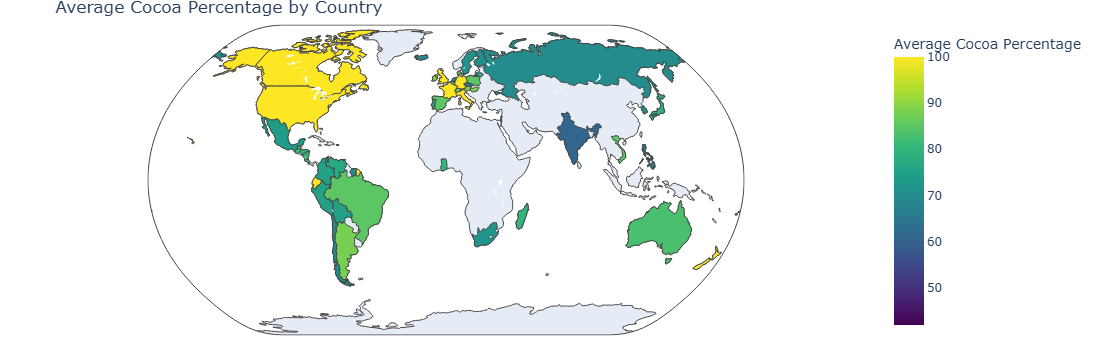

In [59]:
# Create a choropleth map
fig = px.choropleth(avg_cocoa_per_country, 
                    locations='company_location', 
                    locationmode ='country names',
                    color='cocoa_percent',
                    hover_name='company_location',
                    color_continuous_scale='Viridis',
                    projection='natural earth',
                    labels={'cocoa_percent': 'Average Cocoa Percentage'},
                    title='Average Cocoa Percentage by Country')
fig.update_layout(margin={"r":25,"t":25,"l":25,"b":25})

# Display the Plotly figures in a grid layout within a Jupyter Notebook
display(fig)

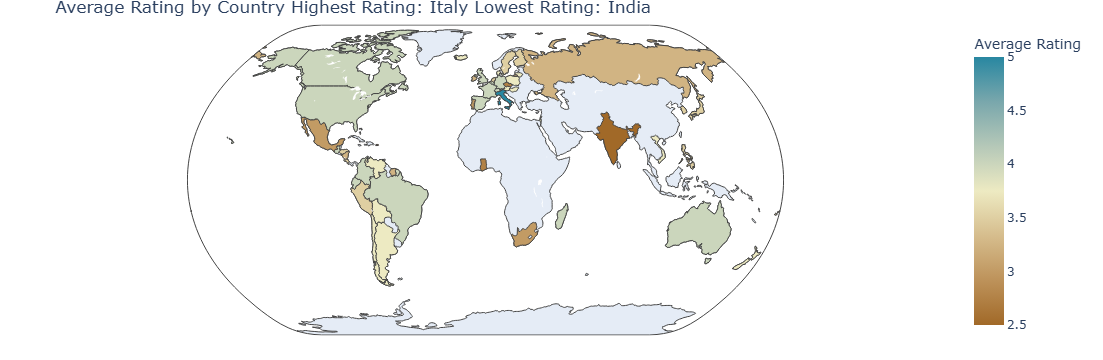

In [60]:
# Create a choropleth map
fig2 = px.choropleth(avg_rating_per_country, 
                    locations='company_location', 
                    locationmode='country names',
                    color='rating',
                    hover_name='company_location',
                    color_continuous_scale='earth',
                    projection='natural earth',
                    labels={'rating': 'Average Rating'},
                    title=f'Average Rating by Country Highest Rating: {highest_rating["company_location"]} Lowest Rating: {lowest_rating["company_location"]}')
fig2.update_layout(margin={"r":25,"t":25,"l":25,"b":25})   
display(fig2)

In [61]:
df_choco.columns

Index(['Company  (Maker-if known)', 'city_origin(bean)', 'reference_numb',
       'review_year', 'cocoa_percent', 'company_location', 'rating',
       'bean_type', 'country_origin(bean)', 'Cocoa_Percent_Range'],
      dtype='object')

In [62]:
# Aggregate the average cocoa percentage for each country
avg_cocoa_per_origin = df.groupby('country_origin(bean)')['cocoa_percent'].mean().reset_index()
# Aggregate the average cocoa percentage for each country
avg_rating_per_origin = df.groupby('country_origin(bean)')['rating'].mean().reset_index()
highest_rating_origin = avg_rating_per_origin.loc[avg_rating_per_country['rating'].idxmax()]
lowest_rating_origin = avg_rating_per_origin.loc[avg_rating_per_country['rating'].idxmin()]

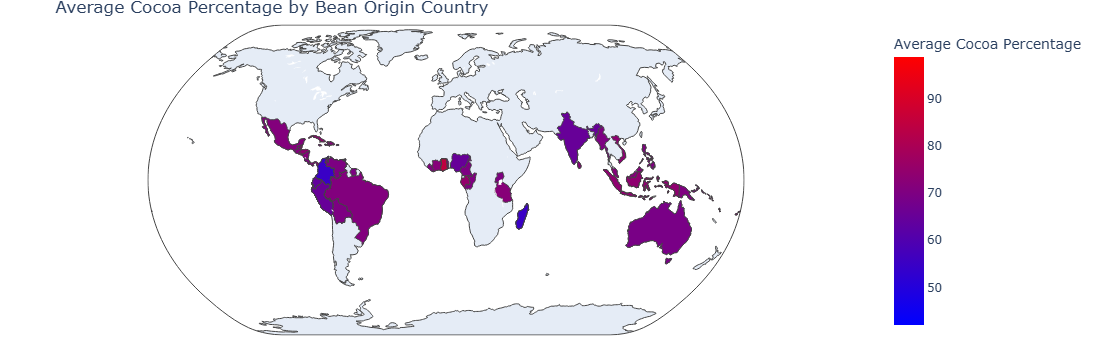

In [63]:
# Create a choropleth map
fig3 = px.choropleth(avg_cocoa_per_origin, 
                    locations='country_origin(bean)', 
                    locationmode='country names',
                    color='cocoa_percent',
                    hover_name='country_origin(bean)',
                    color_continuous_scale='bluered',
                    projection='natural earth',
                    labels={'cocoa_percent': 'Average Cocoa Percentage'},
                    title='Average Cocoa Percentage by Bean Origin Country')

fig3.update_layout(margin={"r":25,"t":25,"l":25,"b":25})
display(fig3)

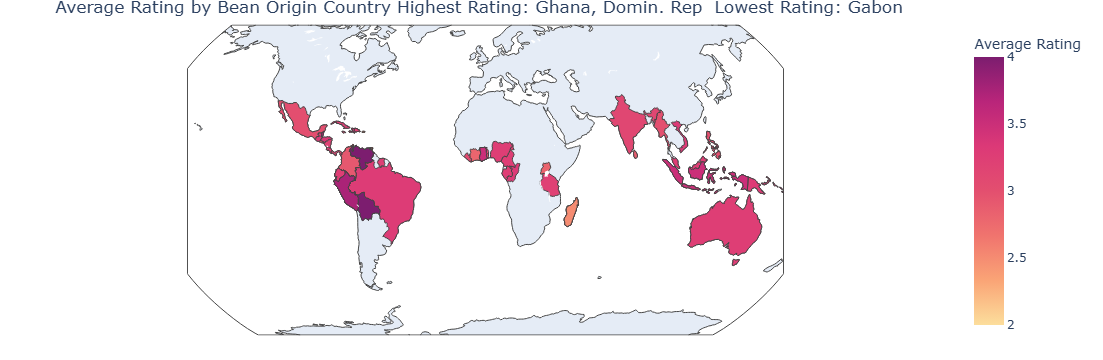

In [64]:
# Create a choropleth map
fig4 = px.choropleth(avg_rating_per_origin, 
                    locations='country_origin(bean)', 
                    locationmode='country names',
                    color='rating',
                    hover_name='country_origin(bean)',
                    color_continuous_scale='sunsetdark',
                    projection='natural earth',
                    labels={'rating': 'Average Rating'},
                    title=f'Average Rating by Bean Origin Country Highest Rating: {highest_rating_origin["country_origin(bean)"]}  Lowest Rating: {lowest_rating_origin["country_origin(bean)"]}',
                    fitbounds="locations")


fig4.update_layout(margin={"r":25,"t":25,"l":25,"b":25})
display(fig4)

In [65]:
# Aggregate the Highest cocoa percentage for each country
avg_cocoa_per_country = df.groupby('company_location')['cocoa_percent'].max().reset_index()
# Aggregate the average cocoa percentage for each country
avg_rating_per_country = df.groupby('company_location')['rating'].max().reset_index()
# Get the country with the highest and lowest average rating
highest_rating = avg_rating_per_country.loc[avg_rating_per_country['rating'].idxmax()]
lowest_rating = avg_rating_per_country.loc[avg_rating_per_country['rating'].idxmin()]


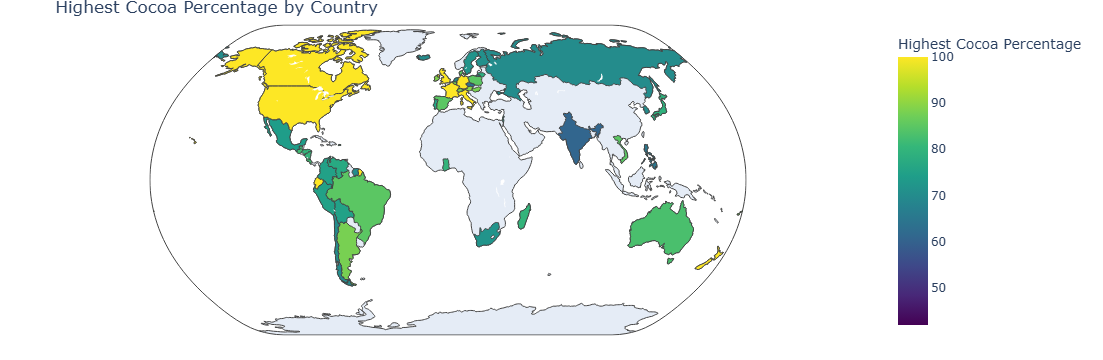

In [66]:
# Create a choropleth map
fig = px.choropleth(avg_cocoa_per_country, 
                    locations='company_location', 
                    locationmode='country names',
                    color='cocoa_percent',
                    hover_name='company_location',
                    color_continuous_scale='Viridis',
                    projection='natural earth',
                    labels={'cocoa_percent': 'Highest Cocoa Percentage'},
                    title='Highest Cocoa Percentage by Country')
fig.update_layout(margin={"r":25,"t":25,"l":25,"b":25})
display(fig)

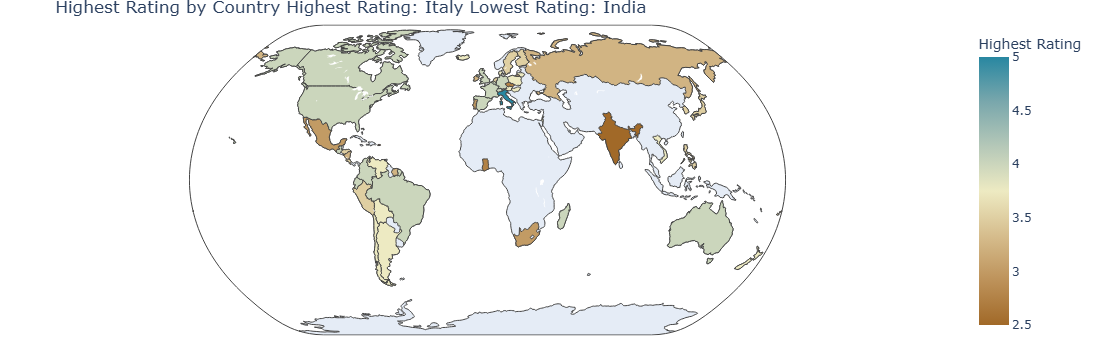

In [68]:
# Create a choropleth map
fig2 = px.choropleth(avg_rating_per_country, 
                    locations='company_location', 
                    locationmode='country names',
                    color='rating',
                    hover_name='company_location',
                    color_continuous_scale='earth',
                    projection='natural earth',
                    labels={'rating': 'Highest Rating'},
                    title=f'Highest Rating by Country Highest Rating: {highest_rating["company_location"]} Lowest Rating: {lowest_rating["company_location"]}')
fig2.update_layout(margin={"r":25,"t":25,"l":25,"b":25}) 
display(fig2)

##### Analysis

##### 01. Highest Rating by country location is Italy that rated 5, while the lowest Rating by country for chocolate bar is india, rating 2.5

##### Answering the question of 'which country produced the highest rated bar? Italy

##### 02. Where are the best cocoa beans grown? Canada, USA, Ecuador, Italy, Germany, UK, New zealand.